In [13]:
### Importing relevant libraries and importing data

# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import math
from functools import reduce
from math import log
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import argrelmin, argrelmax, find_peaks
from scipy.optimize import curve_fit, minimize
from scipy import signal
import warnings
import scipy as sc
from astropy.io import fits
from astropy.table import Table, Column

hdulist = fits.open('../Real Data/Healthy_Control_Data/Four_dots_static.fits')
data = hdulist[0].data

# Getting t data
t = np.linspace(0,500,500)

# Extracting x data and averaging
x = [ [] for i in range(46)]

for i in range(46):

    x[i] = data[1,i,0,:]

x1 = np.array(x)
x_data = np.sum(x1, axis=0)/46

# Extracting y data and averaging
y = [ [] for i in range(46)]

for i in range(46):

    y[i] = data[1,i,1,:]

y1 = np.array(y)
y_data = np.sum(y1, axis=0)/46

# Finding r data
r_data = np.sqrt(x_data**2 + y_data**2)

# Ignoring warnings printed to screen
warnings.filterwarnings("ignore")

In [14]:
### Function to compute takens emedded data for a specified delay and embedding dimension

def takens_embedding(data, delay, dimension):

    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceeds length of data')       # Ensures that delay is not going to be too large such that it is larger than the data length 
    
    embedded_data = np.array([data[0:len(data)-delay*dimension]])

    for i in range(1, dimension):
        embedded_data = np.append(embedded_data, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)

    return embedded_data;

In [15]:
### Function to compute the power specttrum of the phase space

def power_spectrum(data_array,time):

    fouriert_1 = sc.fft.rfft(data_array, len(time))
    fourier_freq = sc.fft.rfftfreq(len(time), d = 1e-3)
    power_spec = np.abs(fouriert_1)**2

    return power_spec, fourier_freq

In [31]:
### Function to compute minimisation to find mid point for linear rise section of the divergence plot 

def minimisation(paramst):

    avlogdiv, n, m1, m2, c1, c2 = paramst

    return m2*avlogdiv[n] + c2 - (m1*avlogdiv[n]+c1)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - x data')

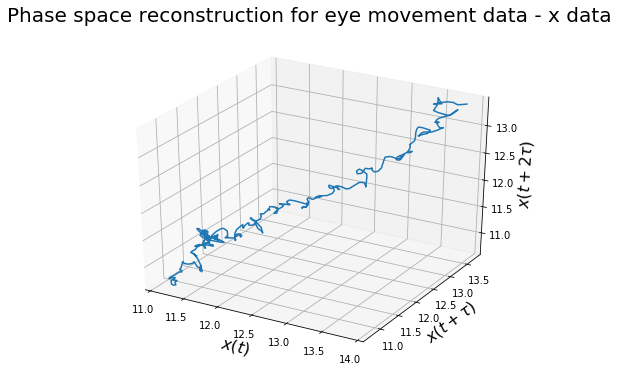

In [17]:
### Performing phase space reconstruction for x data 

embedded_x_final = takens_embedding(x_data, 26, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_x_final[1,:], embedded_x_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - x data', fontsize=20, pad=40)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - y data')

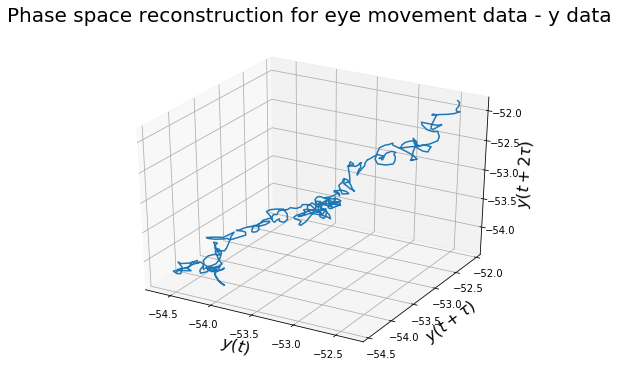

In [30]:
### Performing phase space reconstruction for y data 

embedded_y_final = takens_embedding(y_data, 24, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_y_final[0,:], embedded_y_final[1,:], embedded_y_final[2,:])
ax.set_xlabel('$y(t)$', fontsize=16)
ax.set_ylabel('$y(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$y(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - y data', fontsize=20, pad=40)

Text(0.5, 0, '$r(t+2τ)$')

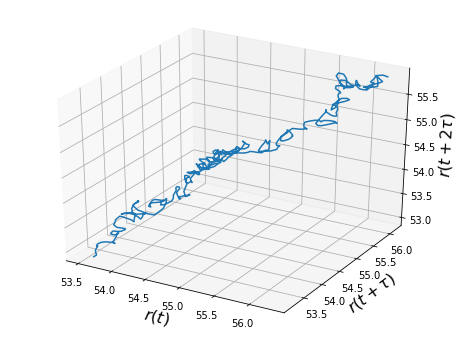

In [19]:
### Performing phase space reconstruction for r data 

embedded_r_final = takens_embedding(r_data, 23, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_r_final[0,:], embedded_r_final[1,:], embedded_r_final[2,:])
ax.set_xlabel('$r(t)$', fontsize=16)
ax.set_ylabel('$r(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$r(t+2\u03C4)$', fontsize=16)

250.0
The period of x data is 0.004 seconds


Text(0, 0.5, 'Power')

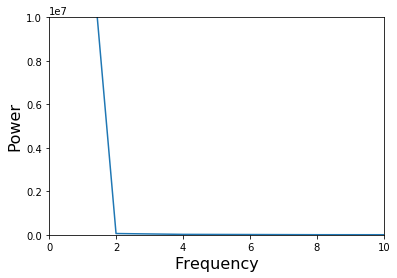

In [20]:
### Power spectrum for x data

# Calculating the power spectrum for x data 
power_spectrum_x = power_spectrum(x_data,t)
freq_x = power_spectrum_x[1]
power_x = power_spectrum_x[0]

# Finding index for the maxima on the graph
mean_freq_x = np.mean(freq_x)
period_x = 1/mean_freq_x

print(mean_freq_x)
print('The period of x data is', + period_x,'seconds')

# Plotting graph and maxima point
plt.plot(freq_x, power_x)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of y data is 0.004 seconds


Text(0, 0.5, 'Power')

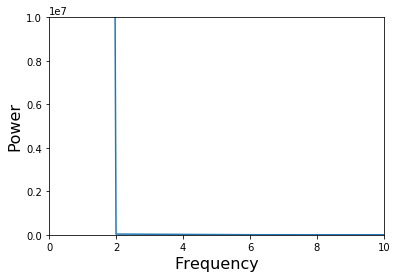

In [21]:
### Power spectrum for y data

power_spectrum_y = power_spectrum(y_data,t)
freq_y = power_spectrum_y[1]
power_y = power_spectrum_y[0]

# Finding index for the maxima on the graph
mean_freq_y = np.mean(freq_y)
period_y = 1/mean_freq_y

print('The period of y data is', + period_y,'seconds')

plt.plot(freq_y, power_y)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of r data is 0.004 seconds


Text(0, 0.5, 'Power')

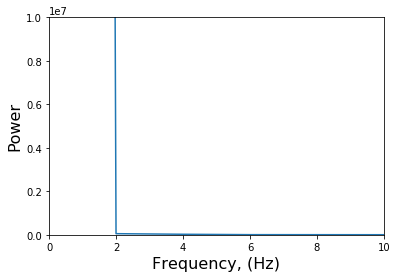

In [22]:
### Power spectrum for r data

power_spectrum_r = power_spectrum(r_data,t)
freq_r = power_spectrum_r[1]
power_r = power_spectrum_r[0]

# Finding index for the maxima on the graph
mean_freq_r = np.mean(freq_r)
period_r = 1/mean_freq_r

print('The period of r data is', + period_r,'seconds')


plt.plot(freq_r, power_r)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency, (Hz)', fontsize=16)
plt.ylabel('Power', fontsize=16)

In [23]:
### Nearest neighbours for x data 

nearest_neighbours_x = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_x_final.transpose())
distances_x, indices_x = nearest_neighbours_x.kneighbors(embedded_x_final.transpose())

print(indices_x[0])

[  0   1   2  23   3  22  24   4  21  25  20  19   9  18  10   8  26   5
  13  14  11  12  17   7  15  27   6  16  30  28  29  31  38  33  34  37
  32  35  36  39  49  50  40  51  48  41  52  47  53  42  43  46  44  54
  45  55  56  57  58  59  60  64  63  61  65  62  75  66  76  67  74  68
  73  69  77  78  72  70  79  71  80  81  82  83  84  85  86  90  89  88
  87  91  92  93 101 100  99  94 102  98  95  97  96 106 103 105 104 107
 108 109 110 111 112 118 117 116 113 114 115 119 125 124 123 120 126 121
 122 127 128 133 132 129 131 134 130 135 136 137 138 139 140 142 141 143
 144 151 150 152 149 145 153 148 146 154 147 155 158 156 159 157 160 164
 163 161 162 165 166 169 177 168 178 167 170 176 179 180 181 171 175 174
 172 182 173 183 186 184 185 188 187 189 190 191 192 193 194 195 196 202
 203 204]


In [24]:
### Nearest neighbours for y data 

nearest_neighbours_y = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_y_final.transpose())
distances_y, indices_y = nearest_neighbours_y.kneighbors(embedded_y_final.transpose())

print(indices_y[0])

[  0   5  10   1   9   6  19   8  18  11  13  12   7  20   4   2   3  17
  21  14  22  23  32  33  24  31  29  16  30  25  15  28  43  57  34  27
  26  42  56  44  35  37  55  36  53  75  41  54  58  52  45  46  38  74
  47  62  76  61  48  40  73  51  64  63  60  59  39  72  77  65  71  86
  49  50  81  66  80  70  78  85  79  82  84  97  98  87  67  83  96  69
  68  99  88  95 100  94  89 102 101 103 104  90  93 105  91  92 106 110
 107 111 109 108 112 122 123 121 124 120 119 125 118 126 113 127 128 117
 114 129 116 130 115 146 145 131 132 133 147 134 144 142 135 148 143 141
 149 150 136 140 151 137 152 139 138 153 166 169 170 154 165 168 167 171
 155 189 172 156 190 164 157 173 188 174 191 192 158 193 159 213 163 194
 212 175 214 187 160 176 195 178 232 161 180 162 233 179 231 196 211 177
 236 235]


In [25]:
### Nearest neighbours for r data 

nearest_neighbours_r = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_r_final.transpose())
distances_r, indices_r = nearest_neighbours_r.kneighbors(embedded_r_final.transpose())

print(indices_r[0])

[  0   1   7   8   2   6  12   9  11  10   3  13   5  20  19   4  21  14
  22  18  15  24  23  25  17  33  16  32  34  31  26  30  29  35  27  28
  43  36  42  53  37  44  54  38  52  57  55  56  41  45  47  39  46  48
  58  40  51  49  75  50  62  61  59  74  63  76  60  64  65  66  73  77
  72  67  81  80  78  82  79  68  71  83  70  69  84  85  88  86  87  89
  98  97  96  99  90 100  95 101 103 102 104  91 105  94  92  93 106 107
 108 111 110 109 112 113 124 123 122 125 126 121 120 127 119 114 128 118
 129 115 117 130 116 131 134 132 133 135 147 148 136 146 143 144 145 149
 142 137 150 151 141 152 138 153 140 139 154 170 155 169 166 171 167 168
 156 157 172 158 165 173 190 159 174 191 189 192 175 193 160 164 194 188
 161 176 214 163 162 177 213 195 178 180 187 181 212 182 215 179 196 197
 198 183]


Text(0.5, 1.0, 'Divergence of x data trajectories')

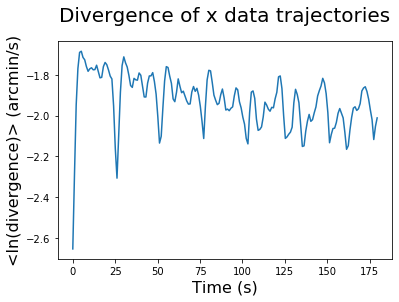

In [26]:
### Divergence for x data 

# Initialising arrays needed for divergence calculation
N = 180
separation_x1 = [ [] for i in range(N)]
logsep_x1 = [ [] for i in range(N)]
lags_x = []
xx_1 = [ [] for i in range(N)]
eps = period_x # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    xx_1[i] = indices_x[i] - i

xx_2 = np.array(xx_1)
times_x = xx_2*1e-3

for i in range(N):

    m_x = 0

    while np.abs(times_x[i][m_x]) < eps and m_x < 199:

        m_x = m_x + 1

    lags_x.append(times_x[i][m_x]) 

lags_x1 = np.array(lags_x)/1e-3
lags_x2 = lags_x1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv1 = np.sqrt((embedded_x_final[0,i+j+lags_x2[i]] - embedded_x_final[0,i+j])**2 + (embedded_x_final[1,i+j+lags_x2[i]] - embedded_x_final[1,i+j])**2 + (embedded_x_final[2,i+j+lags_x2[i]] - embedded_x_final[2,i+j])**2)
        separation_x1[j].append(divv1)


sep_x1 = np.array(separation_x1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_x1[i] = np.log(sep_x1[i])

logsep_x1 = np.array(logsep_x1)

# Calculating the averaged ln(divergence)
av_log_div_x = np.mean(logsep_x1, axis = 1)

# Performing the linear regression calculation
#t_regx = t[0:320].reshape(-1,1)
#divx_reg = av_log_div_x[0:320].reshape(-1,1)

#reg_x = LinearRegression().fit(t_regx, divx_reg)
#grad_x = reg_x.coef_.item()
#intercept_x = reg_x.intercept_.item()

#resx = av_log_div_x[0:320] - (t[0:320]*grad_x + intercept_x)
#resx_sq = np.sum(resx**2)
#tmean = np.mean(t[0:320])
#ttx = np.sum((t[0:320]-tmean)**2)

#error_x = np.sqrt((1/318)*(resx_sq/ttx))

plt.plot(t[0:180], av_log_div_x)
#plt.plot(t[0:320], t[0:320]*grad_x + intercept_x)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of x data trajectories', fontsize=20, pad=20)


#print(grad_x)
#print(error_x)


Text(0.5, 1.0, 'Divergence of y data trajectories')

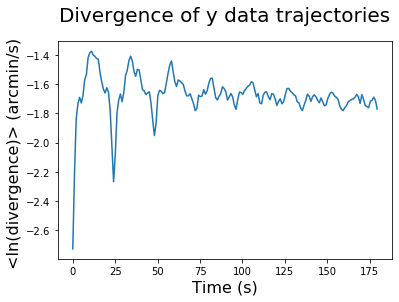

In [27]:
### Divergence for y data 

# Initialising arrays needed for divergence calculation
N = 180
separation_y1 = [ [] for i in range(N)]
logsep_y1 = [ [] for i in range(N)]
lags_y = []
yy_1 = [ [] for i in range(N)]
eps = period_y # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    yy_1[i] = indices_y[i] - i

yy_2 = np.array(yy_1)
times_y = yy_2*1e-3

for i in range(N):

    m_y = 0

    while np.abs(times_y[i][m_y]) < eps and m_y < 199:

        m_y = m_y + 1

    lags_y.append(times_y[i][m_y]) 

lags_y1 = np.array(lags_y)/1e-3
lags_y2 = lags_y1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_y = np.sqrt((embedded_y_final[0,i+j+lags_y2[i]] - embedded_y_final[0,i+j])**2 + (embedded_y_final[1,i+j+lags_y2[i]] - embedded_y_final[1,i+j])**2 + (embedded_y_final[2,i+j+lags_y2[i]] - embedded_y_final[2,i+j])**2)
        separation_y1[j].append(divv_y)


sep_y1 = np.array(separation_y1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_y1[i] = np.log(sep_y1[i])

logsep_y1 = np.array(logsep_y1)

# Calculating the averaged ln(divergence)
av_log_div_y = np.mean(logsep_y1, axis = 1)

# Performing the linear regression calculation
#t_regy = t[0:120].reshape(-1,1)
#divy_reg = av_log_div_y[0:120].reshape(-1,1)

#reg_y = LinearRegression().fit(t_regy, divy_reg)
#grad_y = reg_y.coef_.item()
#intercept_y = reg_y.intercept_.item()

#resy = av_log_div_y[0:120] - (t[0:120]*grad_y + intercept_y)
#resy_sq = np.sum(resy**2)
#tmean_y = np.mean(t[0:120])
#tty = np.sum((t[0:120]-tmean_y)**2)

#error_y = np.sqrt((1/118)*(resy_sq/tty))

plt.plot(t[0:180], av_log_div_y)
#plt.plot(t[0:120], t[0:120]*grad_y + intercept_y)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s) ', fontsize=16)
plt.title('Divergence of y data trajectories', fontsize=20, pad=20)

#print(grad_y)
#print(error_y)


Text(0.5, 1.0, 'Divergence of r data trajectories')

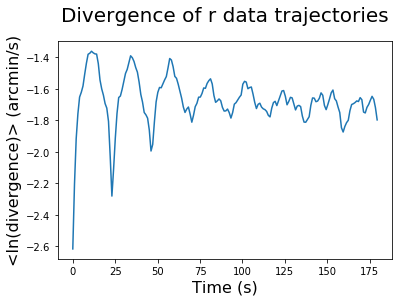

In [28]:
### Divergence for r data 

# Initialising arrays needed for divergence calculation
N = 180
separation_r1 = [ [] for i in range(N)]
logsep_r1 = [ [] for i in range(N)]
lags_r = []
rr_1 = [ [] for i in range(N)]
eps = period_r # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    rr_1[i] = indices_r[i] - i

rr_2 = np.array(rr_1)
times_r = rr_2*1e-3

for i in range(N):

    m_r = 0

    while np.abs(times_r[i][m_r]) < eps and m_r < 199:

        m_r = m_r + 1

    lags_r.append(times_r[i][m_r]) 

lags_r1 = np.array(lags_r)/1e-3
lags_r2 = lags_r1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_r = np.sqrt((embedded_r_final[0,i+j+lags_r2[i]] - embedded_r_final[0,i+j])**2 + (embedded_r_final[1,i+j+lags_r2[i]] - embedded_r_final[1,i+j])**2 + (embedded_r_final[2,i+j+lags_r2[i]] - embedded_r_final[2,i+j])**2)
        separation_r1[j].append(divv_r)


sep_r1 = np.array(separation_r1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_r1[i] = np.log(sep_r1[i])

logsep_r1 = np.array(logsep_r1)

# Calculating the averaged ln(divergence)
av_log_div_r = np.mean(logsep_r1, axis = 1)

# Performing the linear regression calculation
#t_regr = t[0:250].reshape(-1,1)
#divr_reg = av_log_div_r[0:250].reshape(-1,1)

#reg_r = LinearRegression().fit(t_regr, divr_reg)
#grad_r = reg_r.coef_.item()
#intercept_r = reg_r.intercept_.item()

#resr = av_log_div_r[0:250] - (t[0:250]*grad_r + intercept_r)
#resr_sq = np.sum(resr**2)
#tmean_r = np.mean(t[0:250])
#ttr = np.sum((t[0:250]-tmean_r)**2)

#error_r = np.sqrt((1/248)*(resr_sq/ttr))

plt.plot(t[0:180], av_log_div_r)
#plt.plot(t[0:250], t[0:250]*grad_r + intercept_r)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of r data trajectories', fontsize=20, pad=20)

#print(grad_r)
#print(error_r)